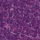

In [2]:
from PIL import Image

# Cargar la imagen
img = Image.open('./inputTensor/Glandula_mamaria/recorte_1.png')

# Mostrar la imagen
img.show()

# (Opcional) Convertir a otro formato (por ejemplo, PNG)
# img.save('ruta_a_tu_imagen.png')


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Configuración
input_dir = './inputTensor/'  # Directorio de las imágenes
img_height, img_width = 224, 224  # Tamaño al que se redimensionan las imágenes
batch_size = 32

# Generadores de datos
datagen = ImageDataGenerator(
    rescale=1.0/255,          # Normalizar valores entre 0 y 1
    validation_split=0.2      # 20% para validación
)

train_data = datagen.flow_from_directory(
    input_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    input_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Construcción del modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_data.num_classes, activation='softmax')  # N clases según carpetas
])

# Compilación
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento
epochs = 10
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs
)

# Guardar modelo
model.save('modelo_tejidos.keras')

# Evaluar en datos de validación
val_loss, val_acc = model.evaluate(val_data)
print(f'Pérdida: {val_loss:.4f}, Precisión: {val_acc:.4f}')


Found 771 images belonging to 5 classes.
Found 192 images belonging to 5 classes.
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.2443 - loss: 2.3687 - val_accuracy: 0.5990 - val_loss: 1.1519
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.5903 - loss: 1.0792 - val_accuracy: 0.7135 - val_loss: 0.8894
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.7103 - loss: 0.7177 - val_accuracy: 0.6927 - val_loss: 0.7792
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.7514 - loss: 0.7221 - val_accuracy: 0.6823 - val_loss: 0.7859
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.7991 - loss: 0.5491 - val_accuracy: 0.8229 - val_loss: 0.5305
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.8284 - loss: 0.4419 - val_accuracy: 0.7812 - val_loss: 0.6200
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.8169 - loss: 0.5071 - val_accuracy: 0.7812 - val_loss: 0.6457
Epoch 8/10
25/25 ━━━━━━━━━━━━

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Cargar el modelo guardado
model = tf.keras.models.load_model('modelo_tejidos.keras')

# Ruta de la imagen a predecir
image_path = './inputTensor/Glandula_mamaria/recorte_1.png'

# Preprocesar la imagen
img_height, img_width = 224, 224  # Tamaño de entrada del modelo
img = load_img(image_path, target_size=(img_height, img_width))  # Cargar y redimensionar
img_array = img_to_array(img)  # Convertir a array
img_array = img_array / 255.0  # Normalizar
img_array = np.expand_dims(img_array, axis=0)  # Añadir dimensión de lote

# Hacer la predicción
predictions = model.predict(img_array)

# Obtener la clase predicha
class_indices = train_data.class_indices  # Diccionario clase: índice (del generador)
class_labels = {v: k for k, v in class_indices.items()}  # Invertir diccionario
predicted_class = class_labels[np.argmax(predictions)]

print(f'La imagen pertenece a la clase: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
La imagen pertenece a la clase: Glandula_mamaria
